# **AP157 Module C Lab Assignment**

## Module C2: Monte Carlo Methods

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: This lab assignment is based on work by Dr. Reyes in collaboration with Gene Belinario and Dr. Reginald Bernardo.

### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/20
* Part 3 - []/30
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In this lab assignment, you will generate constraints on cosmological parameters, the Hubble parameter H_0 and matter density Omega_m,0, from (synthetic) Hubble diagram data points from gravitational-wave (GW) sirens observed from 3 GW observatories: LIGO, LISA, and Einstein Telescope (ET).

The datasets are in the Google Drive "Datasets" Folder under "AP157_moduleC2" subfolder: https://drive.google.com/drive/folders/1UnK1AggxdsjtG3PoOcyXfpahBcWjOBzj?usp=drive_link.

Read in the 3 datasets from the CSV files: LIGO.csv, LISA.csv, ET.csv. The columns are redshift (z), luminosity distance (dL), and error in the luminosity distance (err). The distances are in units of Gpc (giga-parsecs).

Load the data into variable names: zLIGO, dLLIGO, errLIGO, zLISA, dLLISA, errLISA, and zET, dLET, and errET, respectively. Note that these variable names will be used in later parts of the code, so you have to use these names for compatibility.

In [102]:
import pandas as pd

et = pd.read_csv("ET.csv")
ligo = pd.read_csv("LIGO.csv")
lisa = pd.read_csv("LISA.csv")

zLIGO = ligo[["zLIGO"]].to_numpy().flatten()
dlLIGO = ligo[["dlLIGO"]].to_numpy().flatten()
errLIGO = ligo[["errLIGO"]].to_numpy().flatten()

zLISA = lisa[["zLISA"]].to_numpy().flatten()
dlLISA = lisa["dlLISA"].to_numpy().flatten()
errLISA = lisa[["errLISA"]].to_numpy().flatten()

zET = et[["zET"]].to_numpy().flatten()
dlET = et[["dlET"]].to_numpy().flatten()
errET = et[["errET"]].to_numpy().flatten()

By the end of the lab assignment, you will generate constraints on the cosmological parameters H_0 and omega_m,0 for 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET (combined). You will generate a corner plot to visualize these constraints similar to the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

#### PART 1 - Generate Hubble Diagram *(20 points)*

Make a Hubble diagram plot-- with luminosity distance (d_L) in the vertical axis and redshift (z) in the horizontal axis. Show the errors in d_L as error bars.

Plot GW sirens from the 3 observatories in the same plot and include a legend. Briefly describe the difference between the samples from the 3 observatories.

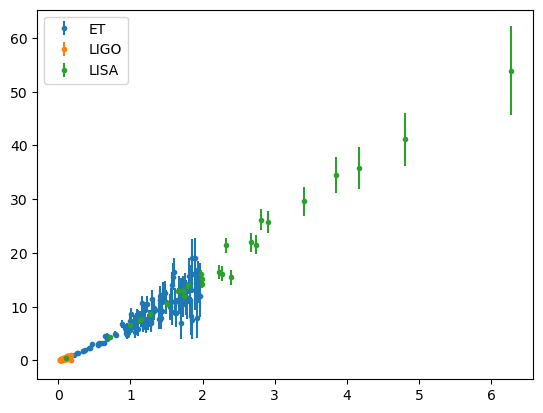

In [103]:
from matplotlib import pyplot as plt
import numpy as np

plt.errorbar(zET, dlET, xerr=None, yerr=errET, fmt='.', label="ET")
plt.errorbar(zLIGO, dlLIGO, xerr=None, yerr=errLIGO, fmt='.', label="LIGO")
plt.errorbar(zLISA, dlLISA, xerr=None, yerr=errLISA, fmt='.', label="LISA")

plt.legend()

#### PART 2 - Define likelihood functions *(20 points)*

In this analysis, we will assume the cosmological model to be flat LambdaCDM universe. This is given by the `FlatLambdaCDM' model from the astropy.cosmology package. In particular, we use the model for the luminosity distance as a function of redshift, which is encoded in the luminosity_distance function.

Below, define the chi-square and likelihood function to be used for the LIGO only and the LIGO+LISA dataset. You are asked to define the analogous functions for the LIGO+LISA+ET dataset. Note that the likelihood for the combined dataset is simply the sum of the likelihoods for the individual datasets.




In [104]:
from astropy.cosmology import FlatLambdaCDM

In [105]:
def chi2LIGO_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)      # define cosmological model
    model = np.array(cosmo.luminosity_distance(zLIGO)/1000) # converted from Gpc to Mpc units
    dev = (model - np.array(dlLIGO).flatten())/np.array(errLIGO).flatten()     # deviations between model and data
    chi2 = sum(dev**2)
    return chi2

def llikeLIGO_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0):
        return -np.inf                        # return inf if outside priors
    else:
        return -0.5*chi2LIGO_lcdm(H0, Om0)

# LIGO + LISA
def chi2LISA_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zLISA)/1000)
    dev = (model - np.array(dlLISA).flatten())/np.array(errLISA).flatten()
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISA_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(H0, Om0) + chi2LISA_lcdm(H0, Om0))

# LIGO + LISA + ET
def chi2ET_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zET)/1000)
    dev = (model - np.array(dlET)).flatten()/np.array(errET).flatten()
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISAET_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(H0, Om0) + chi2LISA_lcdm(H0, Om0) + chi2ET_lcdm(H0, Om0))

#### PART 3 - Perform MCMC runs *(30 points)*

Use the emcee library to set up and perform MCMC runs for the 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET combined.

You can try the ff. parameters-- number of walkers (nwalkers) of 100 and number of iterations (niter) of 1,000 and number of burn-in samples (nburn) of 100.

For the methodology of stepping from one place of the grid to another, you can use:

    dres = [0.1, 0.003] # step size for H_0 and omeg
    pos0 = [result + dres * np.random.randn(ndim) for i in range(nwalkers)]


In [106]:
import emcee

In [127]:
data = (zLIGO, dlLIGO, errLIGO)
nwalkers = 100
niter = 1000
initial = np.array([1.0, 1.0])
ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

In [128]:
def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [129]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,llikeLIGO_lcdm,data)

Running burn-in...
emcee: Exception while calling your likelihood function:
  params: [0.99999994 1.00000022]
  args: [array([0.03326963, 0.1062102 , 0.07381985, 0.04733323, 0.11396616,
       0.06334351, 0.14859383, 0.04503595, 0.07220442, 0.07637484,
       0.12542331, 0.04062567, 0.13418648, 0.11288156, 0.06659189,
       0.12903727, 0.04738481, 0.13904677, 0.08628044, 0.06337685,
       0.07171858, 0.06854914, 0.05075128, 0.10928349, 0.07897256,
       0.15516232, 0.07895063, 0.04683229, 0.06355007, 0.07028129,
       0.11569133, 0.05353093, 0.1194754 , 0.02734324, 0.12539399,
       0.14616401, 0.06722899, 0.11794408, 0.02922567, 0.10115789,
       0.06781548, 0.11656527, 0.03460488, 0.09153471, 0.14549196,
       0.05439418, 0.07330811, 0.10385499, 0.06259524, 0.06612723,
       0.03758876, 0.12014343, 0.06276421, 0.05516892, 0.09324343,
       0.02731364, 0.05460465, 0.14655382, 0.10246975, 0.03812584,
       0.0576423 , 0.03889305, 0.05357056, 0.12905991, 0.04185272,
       0.1

Traceback (most recent call last):
  File "c:\Users\johan\anaconda3\Lib\site-packages\emcee\ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: llikeLIGO_lcdm() takes 2 positional arguments but 4 were given


TypeError: llikeLIGO_lcdm() takes 2 positional arguments but 4 were given

#### PART 4 - Generate corner plot to visualize the constraints *(30 points)*

Overlay the results for the 3 samples for easy comparison. Your plot should resemble the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

Briefly describe the difference between the constraints obtained from the different samples.